In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('fev.txt', usecols=['AGE', 'FEV', 'HEIGHT','SEX', 'SMOKE'])
df['SMOKE'] = df['SMOKE'].replace({2:0})
df['SEX'] = df['SEX'].replace({2:0})
df['SEX*SMOKE']=df['SEX']*df['SMOKE']
df['SMOKE*AGE']=df['SMOKE']*df['AGE']
df

,AGE,FEV,HEIGHT,SEX,SMOKE,SEX*SMOKE,SMOKE*AGE
0,9,1.708,57.0,0,0,0,0
1,8,1.724,67.5,0,0,0,0
2,7,1.720,54.5,0,0,0,0
3,9,1.558,53.0,1,0,0,0
4,9,1.895,57.0,1,0,0,0
...,...,...,...,...,...,...,...
649,16,4.270,67.0,1,1,1,16
650,15,3.727,68.0,1,1,1,15
651,18,2.853,60.0,0,0,0,0
652,16,2.795,63.0,0,1,0,16


In [69]:
l=[]
for i in range(0,100):
    X = df[['AGE', 'SMOKE', 'SEX', 'SEX*SMOKE']]
    y = df['FEV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
    regr = LinearRegression() 
    regr.fit(X_train, y_train) 
    l.append(regr.score(X_test, y_test))
np.mean(l)

0.5921420114778191

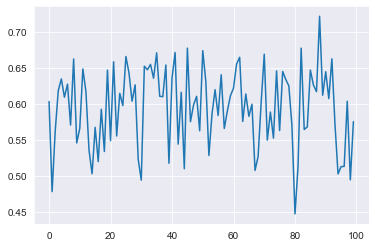

In [4]:
sns.set_style("darkgrid")
plt.plot(l)
plt.show()

In [5]:
m=[]
for i in range(0,100):
    X = df[['AGE', 'SMOKE', 'SEX']]
    y = df['FEV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
    regr = LinearRegression() 
    regr.fit(X_train, y_train) 
    m.append(regr.score(X_test, y_test))
np.mean(m)

0.6014848363285418

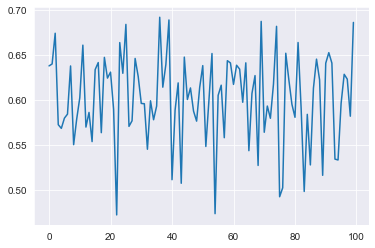

In [6]:
sns.set_style("darkgrid")
plt.plot(m)
plt.show()

In [7]:
df['log'] = np.log(df['FEV'])

In [9]:
df.head()

,AGE,FEV,HEIGHT,SEX,SMOKE,SEX*SMOKE,log
0,9,1.708,57.0,0,0,0,0.535323
1,8,1.724,67.5,0,0,0,0.544647
2,7,1.720,54.5,0,0,0,0.542324
3,9,1.558,53.0,1,0,0,0.443403
4,9,1.895,57.0,1,0,0,0.639219


In [11]:
t=[]
for i in range(0,100):
    X = df[['AGE', 'SMOKE', 'SEX', 'SEX*SMOKE']]
    y = df['log']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
    regr = LinearRegression() 
    regr.fit(X_train, y_train) 
    t.append(regr.score(X_test, y_test))
np.mean(t)

0.6080074131649433

In [13]:
s=[]
for i in range(0,100):
    X = df[['AGE', 'SMOKE', 'SEX']]
    y = df['log']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
    regr = LinearRegression() 
    regr.fit(X_train, y_train) 
    s.append(regr.score(X_test, y_test))
np.mean(s)

0.609001747704395

In [64]:
l=[]
for i in range(0,100):
    X = df[['SMOKE','AGE','SEX']]
    y = df['FEV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
    regr = LinearRegression() 
    regr.fit(X_train, y_train) 
    l.append(regr.score(X_test, y_test))
np.mean(l)

0.6000210630302151

In [ ]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot

st_residual = lin_reg_sam.get_influence().resid_studentized_internal

stats.probplot(st_residual, dist="norm", plot = pylab)

plt.show()

In [165]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X = df[['AGE', 'SMOKE', 'SEX', 'SEX*SMOKE']]
y = df['log']
X_constant = sm.add_constant(X)
lin_reg_saa =sm.OLS(y,X_constant).fit()
print(lin_reg_saa.summary())

                            OLS Regression Results                            
Dep. Variable:                    log   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     266.8
Date:                Mon, 09 Nov 2020   Prob (F-statistic):          1.90e-135
Time:                        15:53:21   Log-Likelihood:                 109.09
No. Observations:                 654   AIC:                            -208.2
Df Residuals:                     649   BIC:                            -185.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0121      0.031     -0.398      0.6

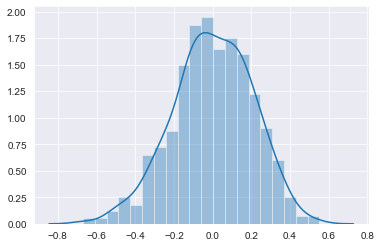

In [166]:
ra= lin_reg_saa.resid
sns.distplot(ra)

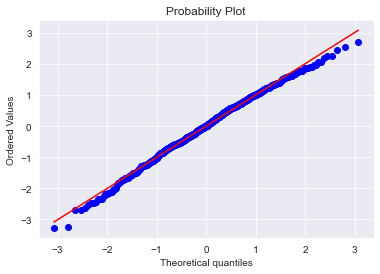

In [167]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot

st_residual = lin_reg_saa.get_influence().resid_studentized_internal

stats.probplot(st_residual, dist="norm", plot = pylab)

plt.show()

In [161]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X = df[['AGE', 'SMOKE', 'SEX']]
y = df['log']
X_constant = sm.add_constant(X)
lin_reg_sam = sm.OLS(y,X_constant).fit()
print(lin_reg_sam.summary())

                            OLS Regression Results                            
Dep. Variable:                    log   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     355.1
Date:                Mon, 09 Nov 2020   Prob (F-statistic):          1.72e-136
Time:                        15:51:06   Log-Likelihood:                 108.46
No. Observations:                 654   AIC:                            -208.9
Df Residuals:                     650   BIC:                            -191.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0158      0.030     -0.521      0.6

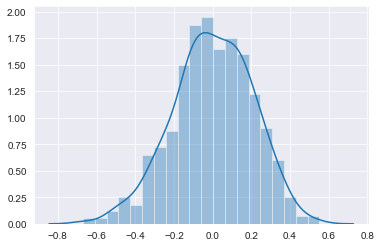

In [168]:
r= lin_reg_sam.resid
sns.distplot(r)

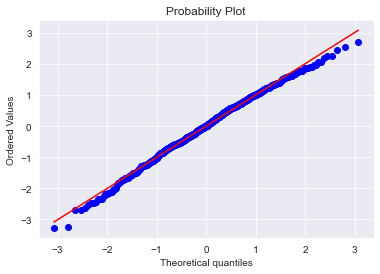

In [169]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot

st_residual = lin_reg_sam.get_influence().resid_studentized_internal

stats.probplot(st_residual, dist="norm", plot = pylab)

plt.show()